## ADSP32029_Final Project

Lalonde(1986) Training Program’s Effect on Earnings Potential

In [20]:
## Imports

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("ggplot")
import statsmodels.formula.api as smf
import matplotlib
from cycler import cycler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Dataset
# https://github.com/robjellis/lalonde/tree/master

# References:
# https://search.r-project.org/CRAN/refmans/designmatch/html/lalonde.html
# https://dataspace-staging.princeton.edu/handle/88435/dsp010p096689n
# The American Economic Review, Vol. 76, No. 4, Sept., 1986, In Orley Ashenfelter and Robert LaLonde (eds.) The Economics of Training, Vol. 2 (Cheltenham, UK:Elgar, 1996)


In [13]:
## Import Data and Head

lalonde = pd.read_csv('lalonde.csv')
lalonde.head()

,ID,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [14]:
## Preprocessing and Describe Data

lalonde = lalonde.drop('ID', axis= 1)
lalonde.describe()


,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [5]:
# Summary Statistics

control_df = lalonde[lalonde.treat==0]
print('Summary statistics of control group')
display(control_df.describe())

treatment_df = lalonde[lalonde.treat==1]
print('\nSummary statistics of treatment group')
display(treatment_df.describe())

Summary statistics of control group


,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,429.0,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.0,28.030303,10.235431,0.202797,0.142191,0.512821,0.596737,5619.236506,2466.484443,6984.169742
std,0.0,10.786653,2.855238,0.402552,0.349654,0.500419,0.491126,6788.750796,3291.996183,7294.161791
min,0.0,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,19.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.181300
50%,0.0,25.000000,11.000000,0.000000,0.000000,1.000000,1.000000,2547.047000,1086.726000,4975.505000
75%,0.0,35.000000,12.000000,0.000000,0.000000,1.000000,1.000000,9277.128000,3881.419000,11688.820000
max,0.0,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,25862.320000,18347.230000,25564.670000



Summary statistics of treatment group


,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.0,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530
std,0.0,7.155019,2.010650,0.364558,0.237124,0.392722,0.455867,4886.620353,3219.250870,7867.402218
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,20.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.229800
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4232.309000
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [ ]:
## Check Control and Treated

lalonde.groupby('treat')['re78'].agg(['count', 'min', 'max', 'median','mean'])

,count,min,max,median,mean
treat,,,,,
0,429,0.0,25564.67,4975.505,6984.169742
1,185,0.0,60307.93,4232.309,6349.143530


In [11]:
# Standardized Differences

X = ['age', 'educ','re74', 're75']
mu = lalonde.groupby('treat')[X].mean()
var = lalonde.groupby('treat')[X].var()

norm_diff = (mu - mu.loc[0]) / np.sqrt((var + var.loc[0]) / 2)
norm_diff

,age,educ,re74,re75
treat,,,,
0,0.000000,0.000000,0.000000,0.000000
1,-0.241904,0.044755,-0.595752,-0.287002


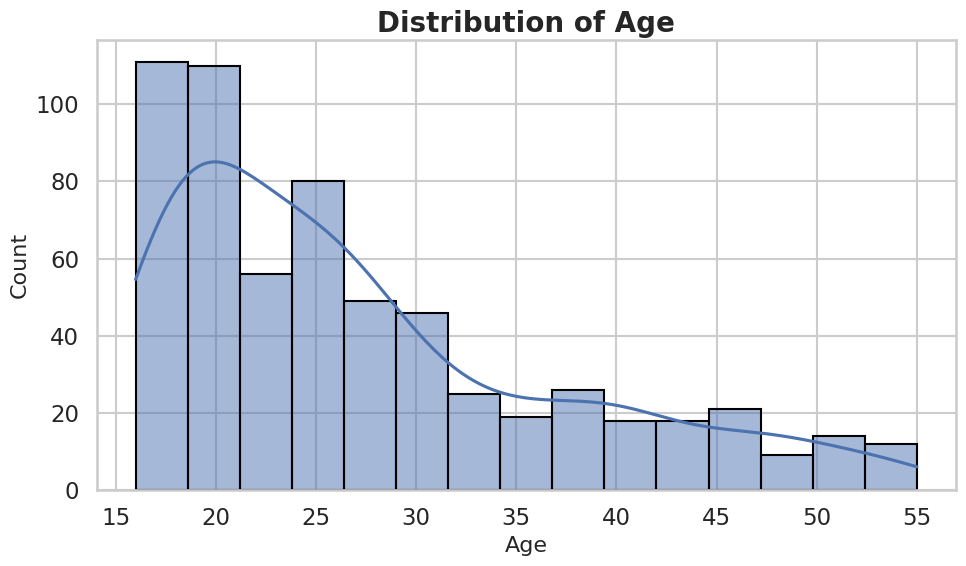

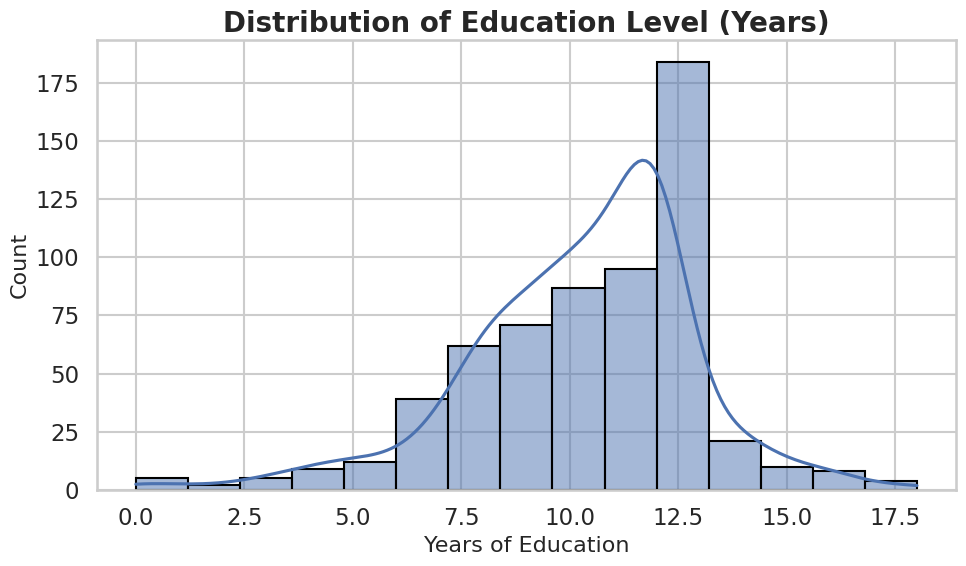

In [6]:
## Check Distribution of Age and Education Level

# Style Settings
sns.set_theme(style="whitegrid", context="talk")

# --- Figure 1: Age Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(lalonde["age"], kde=True, bins=15, edgecolor="black")
plt.title("Distribution of Age", fontsize=20, weight="bold")
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.tight_layout()
plt.show()

# --- Figure 2: Education Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(lalonde["educ"], kde=True, bins=15, edgecolor="black")
plt.title("Distribution of Education Level (Years)", fontsize=20, weight="bold")
plt.xlabel("Years of Education", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.tight_layout()
plt.show()



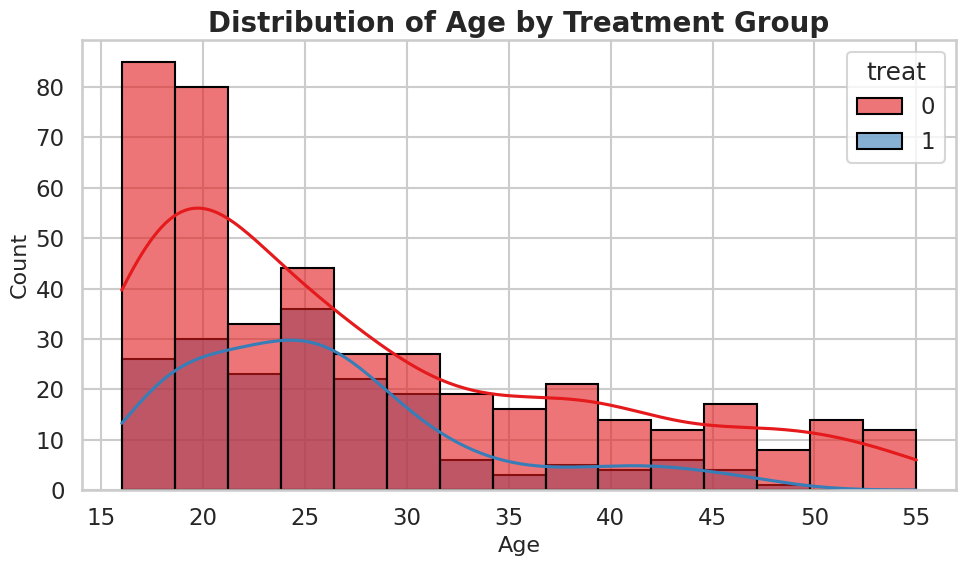

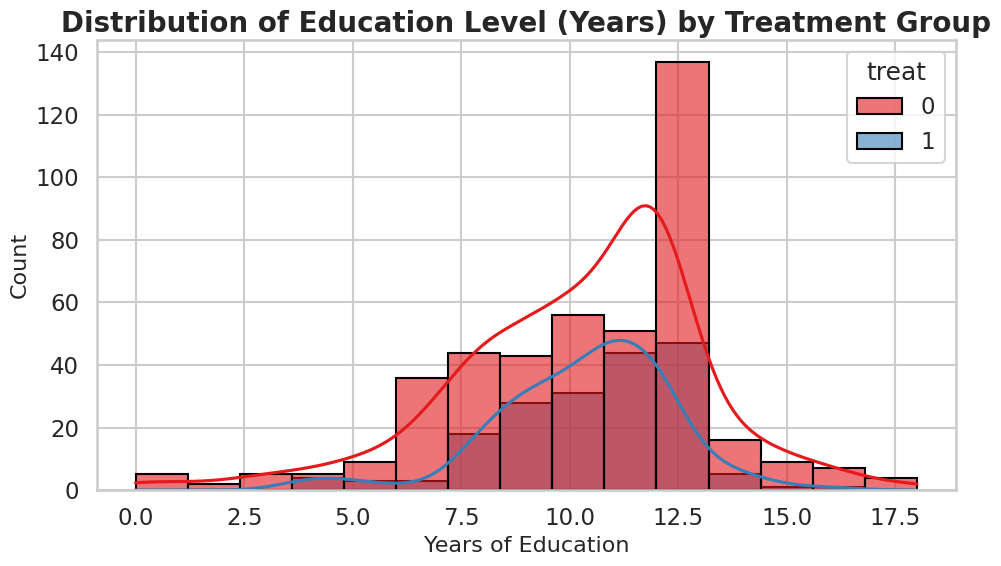

In [8]:
## Age and Educ by Treatment Group

sns.set_theme(style="whitegrid", context="talk")

# --- Figure 1: Age Distribution by Treatment Group ---
plt.figure(figsize=(10, 6))
sns.histplot(data=lalonde, x="age", hue="treat", kde=True, bins=15,
             edgecolor="black", palette="Set1", alpha=0.6)
plt.title("Distribution of Age by Treatment Group", fontsize=20, weight="bold")
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.tight_layout()
plt.show()

# --- Figure 2: Education Distribution by Treatment Group ---
plt.figure(figsize=(10, 6))
sns.histplot(data=lalonde, x="educ", hue="treat", kde=True, bins=15,
             edgecolor="black", palette="Set1", alpha=0.6)
plt.title("Distribution of Education Level (Years) by Treatment Group", fontsize=20, weight="bold")
plt.xlabel("Years of Education", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.tight_layout()
plt.show()

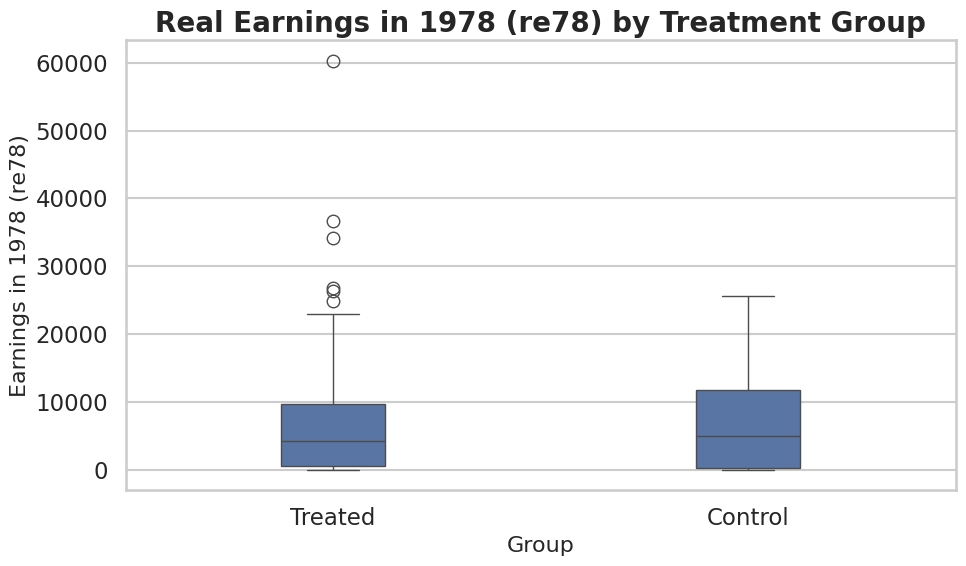

<Figure size 640x480 with 0 Axes>

In [ ]:
# Distribution of re78(Control vs Treated)

# Styling Settings
sns.set_theme(style="whitegrid", context="talk")

data = lalonde.copy()

# Convert treatment indicator to labels
data["treatment_group"] = data["treat"].map({1: "Treated", 0: "Control"})

# --- Boxplot ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="treatment_group",
    y="re78",
    ##palette="pastel",
    width=0.25
)

plt.title("Real Earnings in 1978 (re78) by Treatment Group", fontsize=20, weight="bold")
plt.xlabel("Group", fontsize=16)
plt.ylabel("Earnings in 1978 (re78)", fontsize=16)

# Make y-axis easier to read if values are large
plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()
plt.show()

plt.savefig("realearnings(1978).jpeg", format='jpeg', dpi=300)

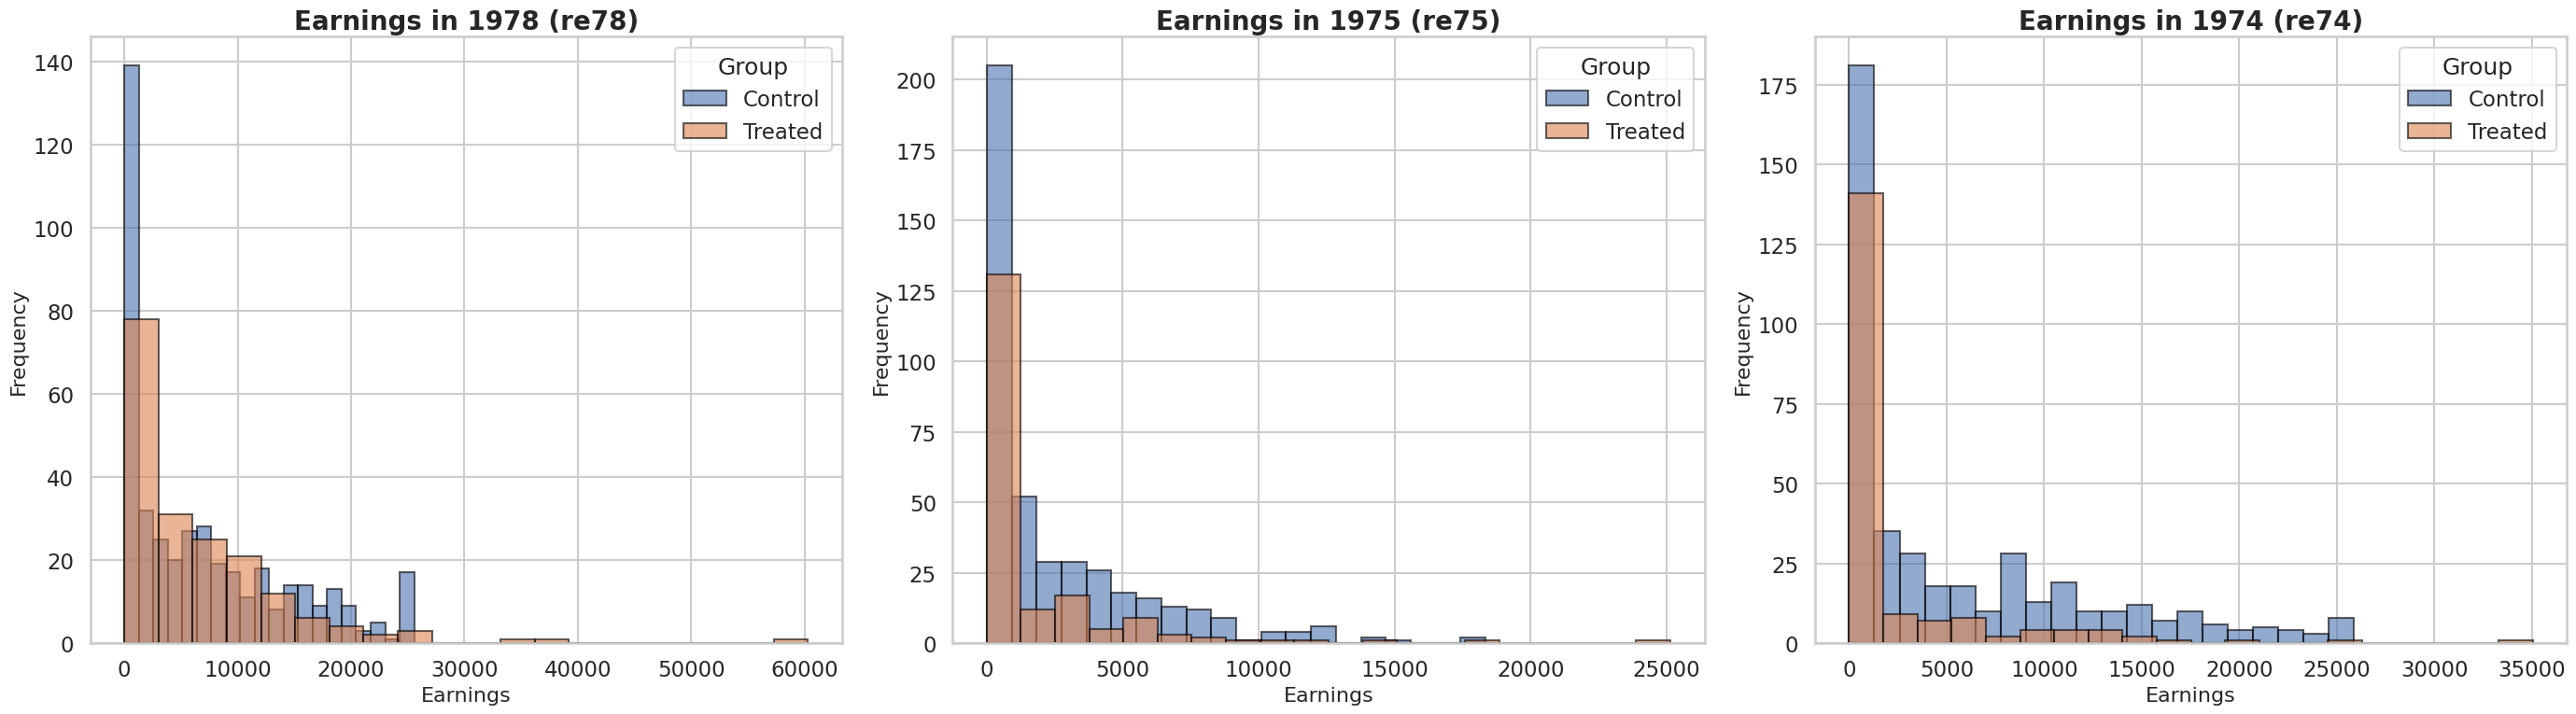

<Figure size 640x480 with 0 Axes>

In [ ]:
# Distribution of real income between treated and control

group_labels = {0: "Control", 1: "Treated"}
data["group"] = data["treat"].map(group_labels)

# Variables to plot
variables = ["re78", "re75", "re74"]
titles = {
    "re78": "Earnings in 1978 (re78)",
    "re75": "Earnings in 1975 (re75)",
    "re74": "Earnings in 1974 (re74)"
}

# Create 3-panel combined visualization
fig, axes = plt.subplots(1, 3, figsize=(28, 8), sharey=False)

for ax, var in zip(axes, variables):
    for group, subset in data.groupby("group"):
        ax.hist(
            subset[var],
            bins=20,
            alpha=0.6,
            label=group,
            edgecolor="black"
        )
    ax.set_title(titles[var], fontsize=20, weight="bold")
    ax.set_xlabel("Earnings", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    ax.ticklabel_format(axis='x', style='plain')
    ax.legend(title="Group")

plt.tight_layout()
plt.show()

plt.savefig("earnings.jpeg", format='jpeg', dpi=300)

## Baseline Regression Analysis


In [7]:
# No Covariates(Baseline)

model = smf.ols('re78 ~ treat', data=lalonde).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6984.1697,360.710,19.362,0.000,6275.791,7692.549
treat,-635.0262,657.137,-0.966,0.334,-1925.544,655.492


In [ ]:
# Linear Regression With Covariates

model = smf.ols('re78 ~ treat + age + educ + black + hispan + married + nodegree + re74 + re75', data=lalonde).fit()
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5145   2436.746      0.027      0.978   -4719.009    4852.038
treat       1548.2438    781.279      1.982      0.048      13.890    3082.598
age           12.9776     32.489      0.399      0.690     -50.827      76.783
educ         403.9412    158.906      2.542      0.011      91.865     716.017
black      -1240.6441    768.764     -1.614      0.107   -2750.420     269.132
hispan       498.8969    941.943      0.530      0.597   -1350.983    2348.777
married      406.6208    695.472      0.585      0.559    -959.217    1772.458
nodegree     259.8174    847.442      0.307      0.759   -1404.474    1924.108
re74           0.2964      0.058      5.086      0.000       0.182       0.411
re75           0.2315      0.105      2.213      0.027       0.026       0.437


In [ ]:
# Using Categorical(Dummy) Variables

model = smf.ols('re78 ~ treat + age + C(educ) + C(black) + C(hispan) + C(married) + C(nodegree) + re74 + re75', data=lalonde).fit()
print(model.summary().tables[1])

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5640.2047   1337.124      4.218      0.000    3014.085    8266.324
C(educ)[T.1]      1.023e+04   6391.779      1.600      0.110   -2324.598    2.28e+04
C(educ)[T.2]      4481.0999   6369.577      0.704      0.482   -8028.792     1.7e+04
C(educ)[T.3]      4078.8104   5102.021      0.799      0.424   -5941.593    1.41e+04
C(educ)[T.4]      2548.5483   4685.719      0.544      0.587   -6654.236    1.18e+04
C(educ)[T.5]      6399.8115   4563.635      1.402      0.161   -2563.199    1.54e+04
C(educ)[T.6]      3049.9992   4536.004      0.672      0.502   -5858.743     1.2e+04
C(educ)[T.7]      1633.2746   4326.183      0.378      0.706   -6863.377    1.01e+04
C(educ)[T.8]      3563.3547   4209.634      0.846      0.398   -4704.394    1.18e+04
C(educ)[T.9]      4293.2826   4222.772      1.017      0.310   -4

In [ ]:
# Frisch-Waugh-Lovell Theorem

FWL_lalonde = lalonde.copy()

## Debiasing Step

debiasing_model = smf.ols(
    'treat ~ age + educ + black + hispan + married + nodegree + re74 + re75',
    data = FWL_lalonde
).fit()

FWL_lalonde['treat_res'] = debiasing_model.resid

## Denoising Step

denoising_model = smf.ols(
    're78 ~ age + educ + black + hispan + married + nodegree + re74 + re75',
    data = FWL_lalonde
).fit()

FWL_lalonde['re78_res'] = denoising_model.resid

## Final Outcome Model

final_model = smf.ols(
    're78_res ~ treat_res',
    data = FWL_lalonde
).fit()

final_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.657e-10,278.556,-5.95e-13,1.000,-547.042,547.042
treat_res,1548.2438,776.156,1.995,0.047,23.991,3072.496


## Propensity Score Matching

In [18]:
## Propensity Scores

pre_treatment_vars = ['age', 'educ', 'married', 'nodegree', 'hispan', 'black', 're74', 're75']

X = lalonde[pre_treatment_vars]
y = lalonde['treat']

log_reg = LogisticRegression()
log_reg.fit(X, y)

lalonde_ps = lalonde

lalonde_ps['propensity_score_logistic'] = log_reg.predict_proba(X)[:, 1]

lalonde_ps.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity_score_logistic
0,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.432245
1,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.133262
2,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.724404
3,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.660355
4,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.696809


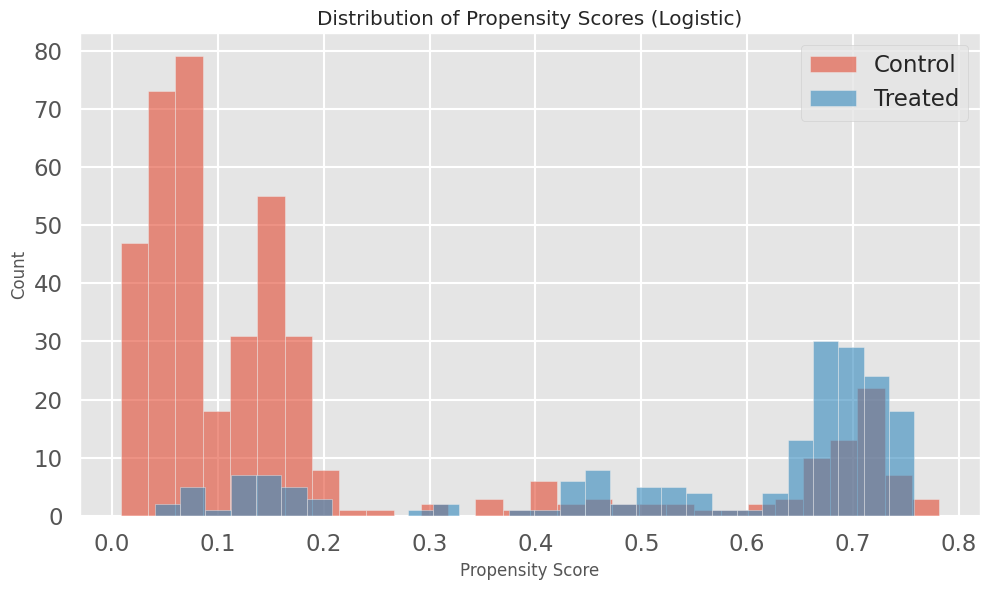

In [19]:
## Distribution of Propensity Scores

treated = lalonde_ps[lalonde_ps["treat"] == 1]["propensity_score_logistic"]
control = lalonde_ps[lalonde_ps["treat"] == 0]["propensity_score_logistic"]

plt.figure(figsize=(10, 6))

plt.hist(control, bins=30, alpha=0.6, label="Control")
plt.hist(treated, bins=30, alpha=0.6, label="Treated")

plt.title("Distribution of Propensity Scores (Logistic)")
plt.xlabel("Propensity Score")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
## Propensity Score Matching

treated = lalonde_ps[lalonde_ps['treat'] == 1]
control = lalonde_ps[lalonde_ps['treat'] == 0]

nn = NearestNeighbors(n_neighbors=1)

nn.fit(control[['propensity_score_logistic']])

distances, indices = nn.kneighbors(treated[['propensity_score_logistic']])

matched_control_indices = indices.flatten()
new_control = control.iloc[matched_control_indices]

matched_data = pd.concat([treated, new_control])

treated_mean = matched_data[matched_data['treat'] == 1]['re78'].mean()
matched_contol_mean =  matched_data[matched_data['treat'] == 0]['re78'].mean()

treatment_effect = treated_mean - matched_contol_mean

print(treatment_effect)

512.1873012972974


In [38]:
## Bootstrap for Propensity Score Matching for 95% C.I

def calculate_matched_treatment_effect(df):
    treated = df[df['treat'] == 1].copy()
    control = df[df['treat'] == 0].copy()

    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(control[['propensity_score_logistic']])
    distances, indices = nn.kneighbors(treated[['propensity_score_logistic']])

    matched_control_indices = indices.flatten()
    new_control = control.iloc[matched_control_indices]

    matched_data = pd.concat([treated, new_control])

    treated_mean = matched_data[matched_data['treat'] == 1]['re78'].mean()
    matched_contol_mean = matched_data[matched_data['treat'] == 0]['re78'].mean()

    treatment_effect = treated_mean - matched_contol_mean

    return treatment_effect


def bootstrap_ci(df, B=1000, alpha=0.05):
    treatment_effects = []
    N = len(df)

    for i in range(B):
        bootstrap_sample = df.sample(n=N, replace=True)

        try:
            effect = calculate_matched_treatment_effect(bootstrap_sample)
            treatment_effects.append(effect)
        except:
            pass

    effects_array = np.array(treatment_effects)

    lower_bound = np.percentile(effects_array, 100 * (alpha / 2))
    upper_bound = np.percentile(effects_array, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound

original_estimate = calculate_matched_treatment_effect(lalonde_ps)
lower, upper = bootstrap_ci(lalonde_ps, B=1000)


print(f"ATE: {original_estimate:,.2f}")
print(f"95% C.I: {lower:,.2f}, {upper:,.2f}")

ATE: 512.19
95% C.I: -1,441.90, 2,690.49


In [ ]:
## Propensity Score Estimation for Inverse Propensity Weighting

ps_model = smf.logit('treat ~ age + educ + black + hispan + married + nodegree + re74 + re75', data=lalonde).fit(disp=0)

data_ps = lalonde.copy().assign(
    propensity_score = ps_model.predict(lalonde)
)

data_ps[['treat', 're78', 'propensity_score']].head()

,treat,re78,propensity_score
0,1,9930.0460,0.638770
1,1,3595.8940,0.224634
2,1,24909.4500,0.678244
3,1,7506.1460,0.776324
4,1,289.7899,0.701639


In [ ]:
## Inverse Probability Weighting

df = data_ps.copy()
treatment = 'treat'

df['ipw'] = np.where(df[treatment] == 1,
                     1 / df['propensity_score'],
                     1 / (1 - df['propensity_score']))

# Estimate ATE as the difference in weighted means
weighted_mean_treated = (df.query('treat == 1')['re78'] * df.query('treat == 1')['ipw']).sum() / df.query('treat == 1')['ipw'].sum()
weighted_mean_control = (df.query('treat == 0')['re78'] * df.query('treat == 0')['ipw']).sum() / df.query('treat == 0')['ipw'].sum()

ipw_ate = weighted_mean_treated - weighted_mean_control
ipw_ate

np.float64(224.6763091039411)

In [ ]:
def compute_ipw_ate(df):
    df = df.copy()

    df['ipw'] = np.where(df['treat'] == 1,
                         1 / df['propensity_score'],
                         1 / (1 - df['propensity_score']))

    treated = df.query("treat == 1")
    control = df.query("treat == 0")

    weighted_mean_treated = np.sum(treated['re78'] * treated['ipw']) / np.sum(treated['ipw'])
    weighted_mean_control = np.sum(control['re78'] * control['ipw']) / np.sum(control['ipw'])

    return weighted_mean_treated - weighted_mean_control

B = 1000
boot_ates = []

n = data_ps.shape[0]

for b in range(B):
    sample_df = data_ps.sample(n, replace=True)
    ate_b = compute_ipw_ate(sample_df)
    boot_ates.append(ate_b)

boot_ates = np.array(boot_ates)

lower = np.percentile(boot_ates, 2.5)
upper = np.percentile(boot_ates, 97.5)

ipw_ate = compute_ipw_ate(data_ps)

ipw_ate, lower, upper

(np.float64(224.6763091039411),
 np.float64(-1480.5090235357513),
 np.float64(2171.6141236172316))

## Diff in Diff

In [42]:
# Simple and OLS Diff in Diff Using re74 as pre-treatment outcome

df = lalonde_ps.copy()
n = len(df)

df_long = pd.DataFrame({
    "id": np.repeat(df.index, 2),
    "treat": np.repeat(df["treat"].to_numpy(), 2),
    "time": np.tile([0, 1], n),
    "earnings": np.concatenate([df["re74"].to_numpy(),
                                df["re78"].to_numpy()])
})

# ---- Manual DID ----
group_means = (
    df_long.groupby(["treat", "time"])["earnings"]
           .mean()
           .reset_index()
)

Y11 = group_means[(group_means.treat == 1) & (group_means.time == 1)]["earnings"].values[0]
Y10 = group_means[(group_means.treat == 1) & (group_means.time == 0)]["earnings"].values[0]
Y01 = group_means[(group_means.treat == 0) & (group_means.time == 1)]["earnings"].values[0]
Y00 = group_means[(group_means.treat == 0) & (group_means.time == 0)]["earnings"].values[0]

did_formula = (Y11 - Y10) - (Y01 - Y00)

# ---- OLS DID ----
model = smf.ols("earnings ~ treat * time", data=df_long).fit()
did_ols = model.params["treat:time"]

# 95% CI from model
conf_int = model.conf_int().loc["treat:time"]
lower_model, upper_model = conf_int[0], conf_int[1]

print("\nOLS DID Estimate and 95% CI:")
print(f"Estimate: {did_ols:.3f}")
print(f"95% CI: [{lower_model:.3f}, {upper_model:.3f}]")


OLS DID Estimate and 95% CI:
Estimate: 638.245
95% CI: [-1090.397, 2366.886]


In [43]:
did_formula

np.float64(638.2445197103252)

In [39]:
# Simple and OLS Diff in Diff Using re75 as pre-treatment outcome

df = lalonde_ps.copy()
n = len(df)

df_long = pd.DataFrame({
    "id": np.repeat(df.index, 2),
    "treat": np.repeat(df["treat"].to_numpy(), 2),
    "time": np.tile([0, 1], n),
    "earnings": np.concatenate([df["re75"].to_numpy(),
                                df["re78"].to_numpy()])
})

# ---- Manual DID ----
group_means = (
    df_long.groupby(["treat", "time"])["earnings"]
           .mean()
           .reset_index()
)

Y11 = group_means[(group_means.treat == 1) & (group_means.time == 1)]["earnings"].values[0]
Y10 = group_means[(group_means.treat == 1) & (group_means.time == 0)]["earnings"].values[0]
Y01 = group_means[(group_means.treat == 0) & (group_means.time == 1)]["earnings"].values[0]
Y00 = group_means[(group_means.treat == 0) & (group_means.time == 0)]["earnings"].values[0]

did_formula = (Y11 - Y10) - (Y01 - Y00)

# ---- OLS DID ----
model = smf.ols("earnings ~ treat * time", data=df_long).fit()
did_ols = model.params["treat:time"]

# 95% CI from model
conf_int = model.conf_int().loc["treat:time"]
lower_model, upper_model = conf_int[0], conf_int[1]

print("\nOLS DID Estimate and 95% CI:")
print(f"Estimate: {did_ols:.3f}")
print(f"95% CI: [{lower_model:.3f}, {upper_model:.3f}]")


OLS DID Estimate and 95% CI:
Estimate: -221.154
95% CI: [-1729.758, 1287.450]


In [40]:
# Simple and OLS Diff in Diff Using avg of re74 and re75 as pre-treatment outcome

df = lalonde_ps.copy()

df['pre_earnings'] = (df["re74"] + df["re75"]) / 2
n = len(df)

df_long = pd.DataFrame({
    "id": np.repeat(df.index, 2),
    "treat": np.repeat(df["treat"].to_numpy(), 2),
    "time": np.tile([0, 1], n),
    "earnings": np.concatenate([df["pre_earnings"].to_numpy(),
                                df["re78"].to_numpy()])
})

# ---- Manual DID ----
group_means = (
    df_long.groupby(["treat", "time"])["earnings"]
           .mean()
           .reset_index()
)

Y11 = group_means[(group_means.treat == 1) & (group_means.time == 1)]["earnings"].values[0]
Y10 = group_means[(group_means.treat == 1) & (group_means.time == 0)]["earnings"].values[0]
Y01 = group_means[(group_means.treat == 0) & (group_means.time == 1)]["earnings"].values[0]
Y00 = group_means[(group_means.treat == 0) & (group_means.time == 0)]["earnings"].values[0]

did_formula = (Y11 - Y10) - (Y01 - Y00)

# ---- OLS DID ----
model = smf.ols("earnings ~ treat * time", data=df_long).fit()
did_ols = model.params["treat:time"]

# 95% CI from model
conf_int = model.conf_int().loc["treat:time"]
lower_model, upper_model = conf_int[0], conf_int[1]

print("\nOLS DID Estimate and 95% CI:")
print(f"Estimate: {did_ols:.3f}")
print(f"95% CI: [{lower_model:.3f}, {upper_model:.3f}]")


OLS DID Estimate and 95% CI:
Estimate: 208.545
95% CI: [-1340.423, 1757.514]
